# Bank Loan Classification Project

In [1]:
#import Libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
Bank_data = pd.read_csv('UniversalBank.csv')
#previewing the dataset
Bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis

In [3]:
#finding out the number of rows and columns of our dataset
Bank_data.shape

(5000, 14)

In [4]:
#getting more insights on our data
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Missing Values

In [5]:
#checking for missing values
Bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:>

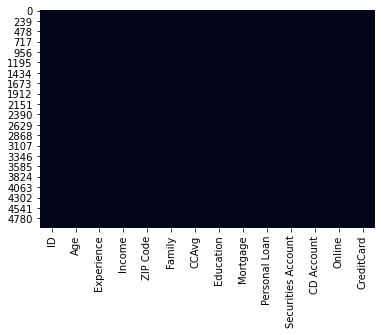

In [6]:
#examining missing values with heatmap
sns.heatmap(Bank_data.isnull(),cbar=False)

From the above we can see our data doesn't have null values

### Dropping Irrelevant colums

In [7]:
#dropping ID and Zip code because we don't need them to predict our Target variable
Bank_data.drop(columns = ['ID', 'ZIP Code'], inplace=True)

In [8]:
#visualizing our data without the dropped columns
Bank_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### Duplicate values

In [9]:
#checking for duplicates
Bank_data.duplicated().sum()

13

In [10]:
#viewing all duplicated data
Bank_data[Bank_data.duplicated(keep = False)]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
125,60,35,80,3,0.50,1,0,0,0,0,1,0
218,44,20,72,3,0.30,3,0,0,0,0,1,0
590,29,3,39,4,2.10,3,0,0,0,0,1,0
738,36,10,80,4,2.20,2,0,0,0,0,1,0
789,29,3,31,4,0.30,2,0,0,0,0,1,0
799,29,3,39,4,2.10,3,0,0,0,0,1,0
930,28,4,43,3,0.10,2,0,0,0,0,1,0
1026,28,4,43,3,0.10,2,0,0,0,0,1,0
1526,36,10,80,4,2.20,2,0,0,0,0,1,0
2031,60,35,80,3,0.50,1,0,0,0,0,1,0


In [11]:
#dropping the duplicates
Bank_data=Bank_data.drop_duplicates()

In [12]:
#checking for duplicates
Bank_data.duplicated().sum()

0

From here we know we have no duplicated data nor any missing data

### Checking Target Variable Distribution

In [13]:
#verifying the shape of our data
Bank_data.shape

(4987, 12)

In [14]:
#these are the columns we are working with
Bank_data.keys()

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [15]:
#checking value_counts of our target variable
Bank_data['Personal Loan'].value_counts()

0    4507
1     480
Name: Personal Loan, dtype: int64

In [16]:
#checking the percentage of the value_counts
Bank_data['Personal Loan'].value_counts(normalize=True)*100

0    90.374975
1     9.625025
Name: Personal Loan, dtype: float64

This shows that our target class has 90% of no events(good loan) and just 9% of events(bad loan)

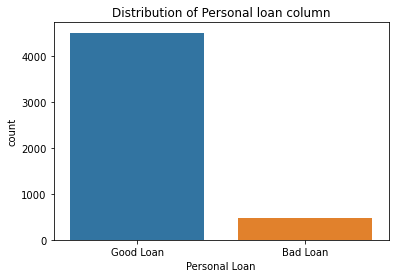

In [17]:
#visualizing the distribution of our target variable
t = sns.countplot(Bank_data['Personal Loan'])
t.set_xticklabels(['Good Loan','Bad Loan'])
plt.title('Distribution of Personal loan column');

from the above we can see that we have an imbalanced dataset, but we'll deal with this in later cells,
let's check the correlation between our columns

### Finding Correlations

In [18]:
#finding correlation between the columns
Bank_data.corr().abs()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994221,0.056897,0.045533,0.052522,0.042356,0.013014,0.008003,0.000715,0.007849,0.013989,0.006381
Experience,0.994221,1.000000,0.048277,0.051718,0.050597,0.014166,0.011083,0.007708,0.001529,0.010151,0.014245,0.007628
Income,0.056897,0.048277,1.000000,0.157922,0.646065,0.186847,0.206420,0.502513,0.002992,0.169589,0.014646,0.003479
Family,0.045533,0.051718,0.157922,1.000000,0.109801,0.066145,0.020595,0.061398,0.019957,0.014081,0.009907,0.012018
CCAvg,0.052522,0.050597,0.646065,0.109801,1.000000,0.135285,0.109162,0.366671,0.014572,0.136241,0.002718,0.007407
Education,0.042356,0.014166,0.186847,0.066145,0.135285,1.000000,0.032256,0.137618,0.010132,0.014475,0.015633,0.010307
Mortgage,0.013014,0.011083,0.206420,0.020595,0.109162,0.032256,1.000000,0.141700,0.005909,0.088987,0.005266,0.007930
Personal Loan,0.008003,0.007708,0.502513,0.061398,0.366671,0.137618,0.141700,1.000000,0.021670,0.316210,0.006718,0.002399
Securities Account,0.000715,0.001529,0.002992,0.019957,0.014572,0.010132,0.005909,0.021670,1.000000,0.316883,0.013096,0.015466
CD Account,0.007849,0.010151,0.169589,0.014081,0.136241,0.014475,0.088987,0.316210,0.316883,1.000000,0.176414,0.278559


<AxesSubplot:>

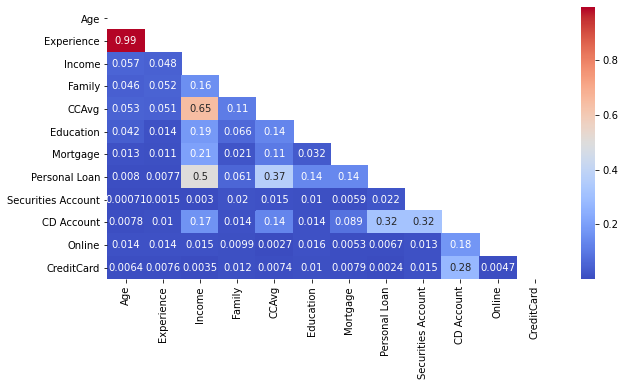

In [19]:
#visualizing the variables correlation with one another
plt.figure(figsize = (10, 5))
mask = np.triu(Bank_data.corr())
sns.heatmap(Bank_data.corr().abs(), annot = True, mask = mask, cmap ='coolwarm')

In [20]:
#looking at the independent variables that are correlated to our target variable
Bank_data.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502513
CCAvg                 0.366671
CD Account            0.316210
Mortgage              0.141700
Education             0.137618
Family                0.061398
Securities Account    0.021670
Online                0.006718
CreditCard            0.002399
Experience           -0.007708
Age                  -0.008003
Name: Personal Loan, dtype: float64

From the above we can see that Income and CCAvg have the most correlation with our target variable, while CD Account, Morgage and Education have a low correlation. Now we can decide to drop the columns with the lowest correlation like Online, CreditCard, Experience and Age, but from the heat map above we can see that these columns have some correlation with the other variables, so we we'll keep them


### Changing our data types

In [21]:
#converting our categorical data to type category
cat_columns=["Family","Education","Personal Loan","Securities Account","CD Account","Online","CreditCard"]
for col in cat_columns:
    Bank_data[col] = Bank_data[col].astype("category")

In [22]:
#checking our data type to see if they've changed
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4987 non-null   int64   
 1   Experience          4987 non-null   int64   
 2   Income              4987 non-null   int64   
 3   Family              4987 non-null   category
 4   CCAvg               4987 non-null   float64 
 5   Education           4987 non-null   category
 6   Mortgage            4987 non-null   int64   
 7   Personal Loan       4987 non-null   category
 8   Securities Account  4987 non-null   category
 9   CD Account          4987 non-null   category
 10  Online              4987 non-null   category
 11  CreditCard          4987 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 428.6 KB


## Splitting our model

I'm splitting my model first before doing any preprocessing techniques to avoid data leakage

In [23]:
X = Bank_data.drop('Personal Loan', axis =1)
y = Bank_data['Personal Loan']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2, stratify = y)

In [25]:
#checking the split
X_train.shape, X_test.shape

((3490, 11), (1497, 11))

In [26]:
#veiwing our train set
X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2546,50,25,9,2,0.0,1,0,1,0,0,0
3343,62,37,125,1,1.0,3,0,0,0,1,0
1671,34,9,20,4,1.1,3,0,0,0,1,0
1740,45,20,59,1,2.4,1,0,1,1,1,0
4205,61,36,139,2,3.9,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3470,57,31,175,2,0.5,1,429,0,0,1,1
2328,27,2,130,3,4.4,1,192,0,0,1,0
3038,34,8,39,4,0.2,1,115,0,0,1,0
1914,48,24,54,1,1.6,2,186,0,0,1,0


We can see our numerical data are on different scales so we have to bring them to the same scale

## Feature Engineering

### Normalizing our data

In [27]:
from sklearn.preprocessing import MinMaxScaler

# define the scaler
scaler = MinMaxScaler()
# fit on the training dataset
scaler.fit(X_train)
# scale the training dataset
X_train = scaler.transform(X_train)
# scale the test dataset
X_test = scaler.transform(X_test)

In [28]:
#putting our fitted and transformed train set in a dataframe
X_train = pd.DataFrame(X_train, columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'] )
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.613636,0.608696,0.004762,0.333333,0.00,0.0,0.0,1.0,0.0,0.0,0.0
1,0.886364,0.869565,0.557143,0.000000,0.10,1.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.260870,0.057143,1.000000,0.11,1.0,0.0,0.0,0.0,1.0,0.0
3,0.500000,0.500000,0.242857,0.000000,0.24,0.0,0.0,1.0,1.0,1.0,0.0
4,0.863636,0.847826,0.623810,0.333333,0.39,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#putting our transformed test set in a dataframe
X_test = pd.DataFrame(X_test, columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'] )
X_test.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.568182,0.565217,0.761905,0.333333,0.28,0.0,0.499190,0.0,0.0,1.0,0.0
1,0.340909,0.347826,0.761905,0.333333,0.13,1.0,0.000000,0.0,0.0,0.0,0.0
2,0.159091,0.195652,0.023810,0.666667,0.09,1.0,0.000000,0.0,0.0,1.0,0.0
3,0.931818,0.934783,0.033333,0.333333,0.03,1.0,0.186386,0.0,0.0,1.0,1.0
4,0.818182,0.782609,0.161905,0.000000,0.08,0.5,0.000000,0.0,0.0,1.0,0.0


In [30]:
print(X_train.shape, X_test.shape)

(3490, 11) (1497, 11)


## Systematic Experimentation

### Choosing the models we'll work with

So first we explored our data to understand it better, then we scaled it, and now it's in a good position to be fit into our algorithms. I'll be experimenting with three different algorithms to see which of these three best classifies our data. The algorithms I'll be using include:
* SVM 
* Random Forest
* XGBoost


### Choosing our Evaluation Metrics

From the EDA we performed, we know that we're wprking with an imbalanced dataset, we also know that most of the times when dealing with an imbalanced dataset, the False Negatives(FN) are usually more important and costly than the (False Positive)FP. So we'll be choosing a metric that pays attention to our FNs, the metrics we'll be using include:
* F2 Score
* Recall
* Matthew's Correlation Coefficient (MCC)

### First let's Build our Baseline Model

I will be using a simple KNN classifier as my baseline model because it is my go-to classifier and I've found it serves as a good baseline. The model will be very simple with no data augumentation techniques applied to the dataset, and will serve as a rock-bottom baseline in performance that any other complex algorithm I use must overcome in order to have skill on the dataset.

In [31]:
from sklearn.neighbors import KNeighborsClassifier #Model selection

knn = KNeighborsClassifier(n_neighbors = 3) #setting my neighbors to 3
knn.fit(X_train, y_train) #Training the model

KNeighborsClassifier(n_neighbors=3)

In [32]:
pred = knn.predict(X_test)

In [33]:
len(pred)

1497

In [34]:
#Evaluating our model
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(confusion_matrix(y_test,pred)) #showing how well we classified our FP and FN

[[1347    6]
 [  51   93]]


In [36]:
pd.DataFrame(confusion_matrix(y_test,pred), #visualizing it in a way where it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1347,6
Actual: True,51,93


From our confusion matrix we can see our baseline model got a lot of FNs as opposed to FPs. Let's look at our classification report to make more sense of it

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1353
           1       0.94      0.65      0.77       144

    accuracy                           0.96      1497
   macro avg       0.95      0.82      0.87      1497
weighted avg       0.96      0.96      0.96      1497



From our classification report we can see that our recall on our minority class is quite low, being just 65%

In [38]:
# calculate the f2-measure and MCC
from sklearn.metrics import fbeta_score
from sklearn.metrics import matthews_corrcoef

f2 = fbeta_score(y_test, pred, beta=2.0)
MCC = matthews_corrcoef(y_test, pred)
print('F2_score: %.2f' % (f2))
print('MCC: %.2f' % (MCC))


F2_score: 0.69
MCC: 0.76


### Results for our baseline model

* Recall = 65%
* F2_score = 69%
* MCC = 76%

Now we can move ahead to create our more complex models that will be tested against our baseline model

## The SVM Model

### Working with our imbalanced dataset

In [39]:
from sklearn.svm import SVC #importing our classifier

svm = SVC()   #housing our classifier in a variable
svm.fit(X_train, y_train)   #feeding our data to our classifier
svm_pred = svm.predict(X_test)  #predicting our model

In [40]:
pd.DataFrame(confusion_matrix(y_test,svm_pred), #visualizing it in a way where it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1349,4
Actual: True,32,112


We can see from our confusion matrix that we got a better result than that of our baseline classifier, now let's check our classification report for more details

In [41]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       0.97      0.78      0.86       144

    accuracy                           0.98      1497
   macro avg       0.97      0.89      0.92      1497
weighted avg       0.98      0.98      0.97      1497



We can see we got a better recall of 78%, let's view the other metrics

In [42]:
svm_f2 = fbeta_score(y_test, svm_pred, beta=2.0)
svm_MCC = matthews_corrcoef(y_test, svm_pred)
print('F2_score: %.2f' % (svm_f2))
print('MCC: %.2f' % (svm_MCC))

F2_score: 0.81
MCC: 0.85


### Results for our SVM model on Imbalanced data

* Recall = 0.78%
* F2_score = 0.81%
* MCC = 0.85%

Now let's try balancing our dataset, to see if it'll give us a better result

### Balancing our dataset by Oversampling using SMOTE

In [43]:
from collections import Counter
from imblearn.over_sampling import SMOTE #importing the oversampler

counter = Counter(y_train)
print('Before: ', counter)  #our y_train before oversampling
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train) #fiting the oversampler to our train sets 
counter = Counter(y_train_smt)
print('After: ', counter) #our y_train after oversampling

Before:  Counter({0: 3154, 1: 336})
After:  Counter({0: 3154, 1: 3154})


In [44]:
#feeding our oversampled data into our model
svm.fit(X_train_smt, y_train_smt)
smt_pred = svm.predict(X_test) #predicting our test data

In [45]:
pd.DataFrame(confusion_matrix(y_test,smt_pred), #visualizing it in a way where it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1323,30
Actual: True,7,137


from the confusion matrix above we can see that our predictions of the true positives has improved(136) and our False negatives has decreased which is exactly what we want

In [46]:
print(classification_report(y_test,smt_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1353
           1       0.82      0.95      0.88       144

    accuracy                           0.98      1497
   macro avg       0.91      0.96      0.93      1497
weighted avg       0.98      0.98      0.98      1497



from our classification report we can see that we have a higher recall of 95%

In [47]:
smt_f2 = fbeta_score(y_test, smt_pred, beta=2.0) #checking our F2 score
smt_MCC = matthews_corrcoef(y_test, smt_pred)  #checking our MCC
print('F2_score: %.2f' % (smt_f2))
print('MCC: %.2f' % (smt_MCC))

F2_score: 0.92
MCC: 0.87


### Results for our Oversampled SVM model

* Recall = 0.95%
* F2_score = 0.92%
* MCC = 0.86%

Overall our scoring metrics has improved a great deal, meaning we have a better model for our data, but let's try an undersampling technique 

### Balancing our dataset by Undersampling using Cluster Centroids

In [48]:
from imblearn.under_sampling import ClusterCentroids  #importing our undersampler

counter = Counter(y_train)  #before undersampling
print('Before: ', counter)
CC = ClusterCentroids(random_state=0) 
X_train_cc, y_train_cc = CC.fit_resample(X_train, y_train)
counter = Counter(y_train_cc)  #after undersampling
print('After: ', counter)

Before:  Counter({0: 3154, 1: 336})
After:  Counter({0: 336, 1: 336})


In [49]:
#feeding our undersampled data into our model
svm.fit(X_train_cc, y_train_cc)
cc_pred = svm.predict(X_test) #predicting our test data

In [50]:
pd.DataFrame(confusion_matrix(y_test, cc_pred), #visualizing it in a way where it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1274,79
Actual: True,6,138


from the confusion matrix above we can see that our predictions of the true positives has improved even more(138), however, our prediction of the true negatives has decreased even more

In [51]:
print(classification_report(y_test, cc_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1353
           1       0.64      0.96      0.76       144

    accuracy                           0.94      1497
   macro avg       0.82      0.95      0.87      1497
weighted avg       0.96      0.94      0.95      1497



from our classification report we can see that we also have a higher recall

In [52]:
cc_f2 = fbeta_score(y_test, cc_pred, beta=2.0) #checking our F2 score
cc_MCC = matthews_corrcoef(y_test, cc_pred)  #checking our MCC
print('F2_score: %.2f' % (cc_f2))
print('MCC: %.2f' % (cc_MCC))

F2_score: 0.87
MCC: 0.75


### Results for our Undersampled SVM model

* Recall = 0.96%
* F2_score = 0.87%
* MCC = 0.75%

From our results we can see that even though our recall has improved a bit, we have a lower F2 score and MCC score, so it's safe to say that the oversampled model performed better than this undersampled model.

Let's see if it can still get better, let's try a combination of both oversampling and undersampling techniques

### Balancing our dataset by Combining the SMOTE Oversampling and the ENN undersampling

In [53]:
from imblearn.combine import SMOTEENN  #importing our undersampler

counter = Counter(y_train)  #before undersampling
print('Before: ', counter)
smenn = SMOTEENN() 
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)
counter = Counter(y_train_smenn)  #after undersampling
print('After: ', counter)

Before:  Counter({0: 3154, 1: 336})
After:  Counter({1: 3114, 0: 2992})


In [54]:
#feeding our combined resampled data into our model
svm.fit(X_train_smenn, y_train_smenn)
smenn_pred = svm.predict(X_test) #predicting our test data

In [55]:
pd.DataFrame(confusion_matrix(y_test, smenn_pred), #visualizing it in a way where it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1314,39
Actual: True,5,139


from the confusion matrix above we can see that our predictions of the true positives and true negatives has really improved!

In [56]:
print(classification_report(y_test, smenn_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1353
           1       0.78      0.97      0.86       144

    accuracy                           0.97      1497
   macro avg       0.89      0.97      0.92      1497
weighted avg       0.98      0.97      0.97      1497



We are seeing an improvement in the recall which is great!

In [57]:
smenn_f2 = fbeta_score(y_test, smenn_pred, beta=2.0) #checking our F2 score
smenn_MCC = matthews_corrcoef(y_test, smenn_pred)  #checking our MCC
print('F2_score: %.2f' % (smenn_f2))
print('MCC: %.2f' % (smenn_MCC))

F2_score: 0.92
MCC: 0.85


### Results for our Combination resampled SVM model

* Recall = 0.97%
* F2_score = 0.91%
* MCC = 0.83%

We can see an improvement in our F2 score and MCC score from that of the undersampled model and our recall has greatly improved. Even though our oversampled model gave us a better F2 and MCC score, we can see from our confusion matrix that this model classifies our minority class better so we will have to go with this Combined SVM model as our best model for best classifying the minority class in our dataset

## The Random Forest Model

### Working with our imbalanced dataset

In [58]:
from sklearn.ensemble import RandomForestClassifier  #importing our classifier

rfc = RandomForestClassifier(random_state = 0)  #housing our classifier in a variable
rfc.fit(X_train, y_train)    #feeding our data to the classifier
rfc_pred = rfc.predict(X_test)   #predictiong our model

In [59]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred), #visualizing it in a way where it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1349,4
Actual: True,14,130


We can see from our confusion matrix that this classifier performed way better than our baseline classifier and imbalanced SVM model, and we didn't even use our balanced dataset, and we can also notice that our model classified the majority class better than the minority class.

Let's quickly see the classification report

In [60]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1353
           1       0.97      0.90      0.94       144

    accuracy                           0.99      1497
   macro avg       0.98      0.95      0.96      1497
weighted avg       0.99      0.99      0.99      1497



We can see that our recall is 90%, which is great given the class imbalance

In [61]:
rfc_f2 = fbeta_score(y_test, rfc_pred, beta=2.0) #checking our F2 score
rfc_MCC = matthews_corrcoef(y_test, rfc_pred)  #checking our MCC
print('F2_score: %.2f' % (rfc_f2))
print('MCC: %.2f' % (rfc_MCC))

F2_score: 0.92
MCC: 0.93


### Results for our Random Forest model on Imbalanced dataset

* Recall = 0.90%
* F2_score = 0.92%
* MCC = 0.93%

The results are in and our RFC is looking like a sweet model for handling class imbalance, our F2 and MCC scores are also pretty high! Let's see how our classifier will perform when the dataset has been balanced.

### Using our SMOTE Oversampled dataset

In [62]:
#feeding our oversampled data into our classifier
rfc.fit(X_train_smt, y_train_smt)
rfc_smt_pred = rfc.predict(X_test) #predicting our test data

In [63]:
pd.DataFrame(confusion_matrix(y_test, rfc_smt_pred),   #visualizing our confusion matrix in a way that it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1343,10
Actual: True,5,139


From our confusion matrix we can see that on the oversampled dataset the RF classifier has classified our minority class better even though its accuracy for classifying the majority class has reduced a bit

Let's check our classification report and other metrics scores to gain more insight

In [64]:
print(classification_report(y_test, rfc_smt_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1353
           1       0.93      0.97      0.95       144

    accuracy                           0.99      1497
   macro avg       0.96      0.98      0.97      1497
weighted avg       0.99      0.99      0.99      1497



we can see we got a way higher recall of 96%, let's check our F2 and MCC scores

In [65]:
rfc_smt_f2 = fbeta_score(y_test, rfc_smt_pred, beta =2.0) #checking our f2 score
rfc_smt_MCC = matthews_corrcoef (y_test, rfc_smt_pred)    #checking our MCC

print('F2_score: %.2f' %(rfc_smt_f2))
print('MCC: %.2f' %(rfc_smt_MCC))

F2_score: 0.96
MCC: 0.94


### Results for our Oversampled Random Forest model

* Recall = 0.96%
* F2_score = 0.95%
* MCC = 0.94%

From the results we can see that we got higher scores fpr all our metrics which is great! Let's try using another resampling technique to see if our classifier will perform better

### Using our Undersampled dataset

In [66]:
#feeding our undersampled data into our classifier
rfc.fit(X_train_cc, y_train_cc)
rfc_cc_pred = rfc.predict(X_test) #predicting our test data

In [67]:
pd.DataFrame(confusion_matrix(y_test, rfc_cc_pred),   #visualizing our confusion matrix in a way that it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1247,106
Actual: True,1,143


From our confusion matrix we can see this model classifies our minority class so well but has cost us some accuracy in our majority class, let's try seeing our classification report

In [68]:
print(classification_report(y_test, rfc_cc_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1353
           1       0.57      0.99      0.73       144

    accuracy                           0.93      1497
   macro avg       0.79      0.96      0.84      1497
weighted avg       0.96      0.93      0.94      1497



As expected our recall has gone up to 99%, let's see how our F2 and MCC scores are doing

In [69]:
rfc_cc_f2 = fbeta_score(y_test, rfc_cc_pred, beta =2.0) #checking our f2 score
rfc_cc_MCC = matthews_corrcoef (y_test, rfc_cc_pred)    #checking our MCC

print('F2_score: %.2f' %(rfc_cc_f2))
print('MCC: %.2f' %(rfc_cc_MCC))

F2_score: 0.87
MCC: 0.72


### Results for our Undersampled Random Forest model

* Recall = 0.99%
* F2_score = 0.87%
* MCC = 0.72%

From the results we can see that we got a really high recall which is good, but this cost us our F2 and MCC scores due to poor classification of the majority class. Let's see if we can strike a good balance by using the combined resampling technique.

### Using our dataset resampled by Combining the SMOTE Oversampling and the ENN undersampling

In [70]:
#feeding our combined resampled data into our classifier
rfc.fit(X_train_smenn, y_train_smenn)
rfc_smenn_pred = rfc.predict(X_test) #predicting our test data

In [71]:
pd.DataFrame(confusion_matrix(y_test, rfc_smenn_pred),   #visualizing our confusion matrix in a way that it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1339,14
Actual: True,4,140


We can see from our confusion matrix we can see our classification of the minority class has reduced a bit but we have a way better balance in the classification of our majority and minority classes. Let's see our classification report and the other scoring metrics

In [72]:
print(classification_report(y_test, rfc_smenn_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1353
           1       0.91      0.97      0.94       144

    accuracy                           0.99      1497
   macro avg       0.95      0.98      0.97      1497
weighted avg       0.99      0.99      0.99      1497



we can see that we still have a high recall of 97%

In [73]:
rfc_smenn_f2 = fbeta_score(y_test, rfc_smenn_pred, beta =2.0) #checking our f2 score
rfc_smenn_MCC = matthews_corrcoef (y_test, rfc_smenn_pred)    #checking our MCC

print('F2_score: %.2f' %(rfc_smenn_f2))
print('MCC: %.2f' %(rfc_smenn_MCC))

F2_score: 0.96
MCC: 0.93


### Results for our Combination resampled Random Forest model

* Recall = 0.97%
* F2_score = 0.95%
* MCC = 0.92%

We can see an impprove in our F2 score and MCC score from that of the undersampled model and our recall is still pretty good. Just like in our SVM models, even though our oversampled RFC model gave us a better MCC score, we can see from our confusion matrix that this RFC combined model classifies our minority class better so we will have to go with this Combined RFC model as our best model for best classifying the minority class in our dataset.

And this is also so far our best model yet!

## The XGBoost Model

For this model we are just going to work on the imbalanced data and then work on data that has been resampled by combining the SMOTE oversampler and the ENN undersampler, this is because from our previous models we can say that this gives the best data for predictions

### Working with our imbalanced dataset

In [74]:
from xgboost import XGBClassifier  #importing our classifier

xgb = XGBClassifier(random_state = 0)  #housing our classifier in a variable
xgb.fit(X_train, y_train)    #feeding our data to the classifier
xgb_pred = xgb.predict(X_test)   #predictiong our model

[23:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
pd.DataFrame(confusion_matrix(y_test, xgb_pred),   #visualizing our confusion matrix in a way that it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1349,4
Actual: True,10,134


We can see from our confusion matrix that this classifier performed  better than our baseline classifier, imbalanced SVM model and also our imbalanced Random Forest Model, we can also see that our model classified the majority class better than the minority class.

Let's quickly see the classification report

In [76]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1353
           1       0.97      0.93      0.95       144

    accuracy                           0.99      1497
   macro avg       0.98      0.96      0.97      1497
weighted avg       0.99      0.99      0.99      1497



we can see we have a high recall of 93% even on the imbalanced data!

In [77]:
xgb_f2 = fbeta_score(y_test, xgb_pred, beta =2.0) #checking our f2 score
xgb_MCC = matthews_corrcoef (y_test, xgb_pred)    #checking our MCC

print('F2_score: %.2f' %(xgb_f2))
print('MCC: %.2f' %(xgb_MCC))

F2_score: 0.94
MCC: 0.95


### Results for our Imbalanced XGBoost model

* Recall = 0.93%
* F2_score = 0.94%
* MCC = 0.95%

We can see from our results that all our scoring metrics are high, this has to be the best model on our imbalanced dataset, let's try using the classifier on a balanced dataset

### Using our dataset resampled by Combining the SMOTE Oversampling and the ENN undersampling

In [78]:
#feeding our combined resampled data into our classifier
xgb.fit(X_train_smenn, y_train_smenn)
xgb_smenn_pred = xgb.predict(X_test) #predicting our test data

[23:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [79]:
pd.DataFrame(confusion_matrix(y_test, xgb_smenn_pred),   #visualizing our confusion matrix in a way that it'll make more sense
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1340,13
Actual: True,7,137


from our confusion matrix we can see that our model has classified our minority class better while also classifying our majority class correctly

In [80]:
print(classification_report(y_test, xgb_smenn_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1353
           1       0.91      0.95      0.93       144

    accuracy                           0.99      1497
   macro avg       0.95      0.97      0.96      1497
weighted avg       0.99      0.99      0.99      1497



we have a high recall of 96%, not as high as that of the combined RFC  though

In [81]:
xgb_smenn_f2 = fbeta_score(y_test, xgb_smenn_pred, beta =2.0) #checking our f2 score
xgb_smenn_MCC = matthews_corrcoef (y_test, xgb_smenn_pred)    #checking our MCC

print('F2_score: %.2f' %(xgb_smenn_f2))
print('MCC: %.2f' %(xgb_smenn_MCC))

F2_score: 0.94
MCC: 0.92


### Results for our Combination resampled XGBoost model

* Recall = 0.96%
* F2_score = 0.95%
* MCC = 0.93%

From our results we can say that our metrics are pretty high, the RF classifier gives us a higher recall while this gives us a higher MCC score

## Summary

I was working with a dataset that had 14 features (columns), and 5000 observations(rows). The goal was to best classify the Personal loan column which had two classes, hence I was working with a Binary Classification Problem. Some of the steps I took include:

* Exploratory Data Analysis(EDA): Here I found that there was no missing values in the dataset, there were some duplicate values which I dropped. I also viewed each columns correlation with one another and with the target variable, and dropped irrelevant columns and columns with very little correlation.

* Feature Engineering: I changed the categorical variables from numeric to category datatype, I also normalized the numerical features of the train set after splitting the dataset to train and test sets

* Model Selection: I selected different models (SVM, Random Forest, XGBoost) and compared their performance to one another, I also started with a baseline model which was a simple KNN classifier

* Evaluation Metric: I chose an evaluation metric that would best evaluate the performance of the minority class, since that is of utmost importance

* Class Imbalance: I trained each of the models with both an imbalanced dataset and one resampled with various techniques (Oversampling, Undersampling and Combination techniques)

Finally the results for each model was compared against each other and the best performing one was highlighted.

## Conclusion

We can conclude that the models that best classify the minority class of our target variable without costing us a lot of accuracy in the majority class in this given dataset is the **Random Forest Classifier when trained on the train sets that has been resampled by combining the SMOTE Oversampler and the ENN undersampler** and the **XGBoost Model when trained on the imbalanced dataset**